# BIODIVERSITY PROJECT 

In [43]:
# This project analyzes the data about species in the National Parks. 

In [2]:
# importing the libraries
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

In [3]:
# Loading the dataset
species = pd.read_csv("C:\\Users\\Lenovo\\OneDrive\\Documents\\UADSL\\PYTHON\\DATA\\BIODIVERSITY_SOLUTION\\species_info.csv")
species

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN
...,...,...,...,...
5819,Vascular Plant,Solanum parishii,Parish's Nightshade,NaN
5820,Vascular Plant,Solanum xanti,"Chaparral Nightshade, Purple Nightshade",NaN
5821,Vascular Plant,Parthenocissus vitacea,"Thicket Creeper, Virginia Creeper, Woodbine",NaN
5822,Vascular Plant,Vitis californica,"California Grape, California Wild Grape",NaN


In [4]:
species = species.rename(columns={"category": "Category", "scientific_name": "Scientific_Name", "common_names":"Common_Names","conservation_status":"Conservation_Status"})
species.head()

,Category,Scientific_Name,Common_Names,Conservation_Status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


In [5]:
# The number of different species found in the species Dataframe
species.Scientific_Name.nunique()

5541

In [6]:
# The number of different species found in the category in species Dataframe
species.Category.nunique()

7

In [7]:
species.Category.unique()

array(['Mammal', 'Bird', 'Reptile', 'Amphibian', 'Fish', 'Vascular Plant',
       'Nonvascular Plant'], dtype=object)

In [8]:
species["Category"].value_counts

<bound method IndexOpsMixin.value_counts of 0               Mammal
1               Mammal
2               Mammal
3               Mammal
4               Mammal
             ...      
5819    Vascular Plant
5820    Vascular Plant
5821    Vascular Plant
5822    Vascular Plant
5823    Vascular Plant
Name: Category, Length: 5824, dtype: object>

In [9]:
# The different values of conservation status
species.Conservation_Status.unique()

array([nan, 'Species of Concern', 'Endangered', 'Threatened',
       'In Recovery'], dtype=object)

In [10]:
species.describe()

,Category,Scientific_Name,Common_Names,Conservation_Status
count,5824,5824,5824,191
unique,7,5541,5504,4
top,Vascular Plant,Castor canadensis,Brachythecium Moss,Species of Concern
freq,4470,3,7,161


In [11]:
# using the groupby to count how many scientific_names meet the criteria
species.groupby("Conservation_Status").Scientific_Name.nunique().reset_index()

,Conservation_Status,Scientific_Name
0,Endangered,15
1,In Recovery,4
2,Species of Concern,151
3,Threatened,10


In [12]:
# Filling the missing values with a value
species.fillna("No Intervention", inplace = True)

In [13]:
species.head()

,Category,Scientific_Name,Common_Names,Conservation_Status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,No Intervention
1,Mammal,Bos bison,"American Bison, Bison",No Intervention
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",No Intervention
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Intervention
4,Mammal,Cervus elaphus,Wapiti Or Elk,No Intervention


In [14]:
protection_counts = species.groupby("Conservation_Status").Scientific_Name.nunique().reset_index().sort_values(by = "Scientific_Name")

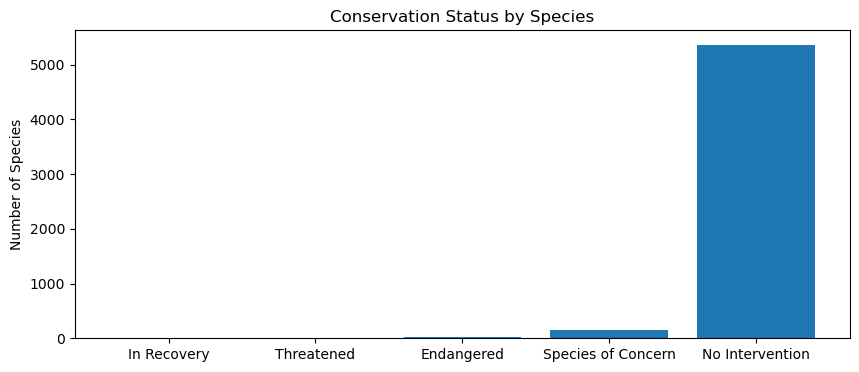

In [15]:
# Creating a bar chart
plt.figure(figsize=(10, 4))
ax = plt.subplot()
plt.bar(range(len(protection_counts)),
        protection_counts.Scientific_Name.values)
ax.set_xticks(range(len(protection_counts)))
ax.set_xticklabels(protection_counts.Conservation_Status.values)
plt.ylabel('Number of Species')
plt.title('Conservation Status by Species')
plt.show()

In [16]:
# Creating a new column in species called is_protected which is True if the conservation_status is not equal to No Intervention and false if otherwise
species['Is_Protected'] = species.Conservation_Status != 'No Intervention'
species.head()

,Category,Scientific_Name,Common_Names,Conservation_Status,Is_Protected
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,No Intervention,False
1,Mammal,Bos bison,"American Bison, Bison",No Intervention,False
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",No Intervention,False
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Intervention,False
4,Mammal,Cervus elaphus,Wapiti Or Elk,No Intervention,False


In [17]:
# Grouping the species dataframe by category called is_protected" columns and counting the unique scientif names. The results are saved to category_counts
Category_count = species.groupby(["Category", "Is_Protected"]).Scientific_Name.nunique().reset_index()
Category_count.head()

,Category,Is_Protected,Scientific_Name
0,Amphibian,False,72
1,Amphibian,True,7
2,Bird,False,413
3,Bird,True,75
4,Fish,False,115


In [18]:
# Pivoting the data for better and easier reading
Category_pivot = Category_count.pivot(columns ="Is_Protected", index = "Category", values = "Scientific_Name").reset_index()
Category_pivot

Is_Protected,Category,False,True
0,Amphibian,72,7
1,Bird,413,75
2,Fish,115,11
3,Mammal,146,30
4,Nonvascular Plant,328,5
5,Reptile,73,5
6,Vascular Plant,4216,46


In [19]:
from scipy.stats import chi2_contingency

In [23]:
# From the data given, it is more likely that mammals are likely to be endangered than the species called bird
chi2_contingency(contingency)

Chi2ContingencyResult(statistic=0.1617014831654557, pvalue=0.6875948096661336, dof=1, expected_freq=array([[ 27.8313253, 148.1686747],
       [ 77.1686747, 410.8313253]]))

In [22]:
# Creating a contigency table called contigency and fillinf it in with numbers 
contingency = [[30, 146],
              [75, 413]]

In [ ]:
# Contigency table between Reptile and Mammal
contingency = [[30, 146],
               [5, 73]]
chi2_contingency(contingency)

In [24]:
## Reading a csv called observations
observations = pd.read_csv("C:\\Users\\Lenovo\\OneDrive\\Documents\\UADSL\\PYTHON\\DATA\\BIODIVERSITY_SOLUTION\\observations.csv")
observations.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


In [26]:
# Creating a new column called common_names that returns True if the common_names has sheep
species["is_sheep"] = species.Common_Names.apply(lambda x: "Sheep" in x)
species.head()

,Category,Scientific_Name,Common_Names,Conservation_Status,Is_Protected,is_sheep
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,No Intervention,False,False
1,Mammal,Bos bison,"American Bison, Bison",No Intervention,False,False
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",No Intervention,False,False
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Intervention,False,True
4,Mammal,Cervus elaphus,Wapiti Or Elk,No Intervention,False,False


In [27]:
# rows where is_sheep is true
species[species.is_sheep] 

,Category,Scientific_Name,Common_Names,Conservation_Status,Is_Protected,is_sheep
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Intervention,False,True
1139,Vascular Plant,Rumex acetosella,"Sheep Sorrel, Sheep Sorrell",No Intervention,False,True
2233,Vascular Plant,Festuca filiformis,Fineleaf Sheep Fescue,No Intervention,False,True
3014,Mammal,Ovis canadensis,"Bighorn Sheep, Bighorn Sheep",Species of Concern,True,True
3758,Vascular Plant,Rumex acetosella,"Common Sheep Sorrel, Field Sorrel, Red Sorrel,...",No Intervention,False,True
3761,Vascular Plant,Rumex paucifolius,"Alpine Sheep Sorrel, Fewleaved Dock, Meadow Dock",No Intervention,False,True
4091,Vascular Plant,Carex illota,"Sheep Sedge, Smallhead Sedge",No Intervention,False,True
4383,Vascular Plant,Potentilla ovina var. ovina,Sheep Cinquefoil,No Intervention,False,True
4446,Mammal,Ovis canadensis sierrae,Sierra Nevada Bighorn Sheep,Endangered,True,True


In [28]:
# creating a variable called sheep_species and selecting rows where the is_sheep is true and the category is mammal
sheep_species = species[(species.is_sheep) & (species.Category == "Mammal")]
sheep_species

,Category,Scientific_Name,Common_Names,Conservation_Status,Is_Protected,is_sheep
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Intervention,False,True
3014,Mammal,Ovis canadensis,"Bighorn Sheep, Bighorn Sheep",Species of Concern,True,True
4446,Mammal,Ovis canadensis sierrae,Sierra Nevada Bighorn Sheep,Endangered,True,True


In [35]:
# Merging sheep_species and observatio I ns to get a dataframe with observations called sheep
sheep_observations = observations.merge(sheep_species)
sheep_observations.head()

,Scientific_Name,park_name,observations,Category,Common_Names,Conservation_Status,Is_Protected,is_sheep
0,Ovis canadensis,Yellowstone National Park,219,Mammal,"Bighorn Sheep, Bighorn Sheep",Species of Concern,True,True
1,Ovis canadensis,Bryce National Park,109,Mammal,"Bighorn Sheep, Bighorn Sheep",Species of Concern,True,True
2,Ovis canadensis,Yosemite National Park,117,Mammal,"Bighorn Sheep, Bighorn Sheep",Species of Concern,True,True
3,Ovis canadensis,Great Smoky Mountains National Park,48,Mammal,"Bighorn Sheep, Bighorn Sheep",Species of Concern,True,True
4,Ovis canadensis sierrae,Yellowstone National Park,67,Mammal,Sierra Nevada Bighorn Sheep,Endangered,True,True


In [36]:
# Renaming columns
observations = observations.rename(columns={"scientific_name":"Scientific_Name"})
observations.head()

,Scientific_Name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


In [40]:
# The number of sheep observations were made at each national park
# using groupby to get sum of observations for each park name
obs_by_park = sheep_observations.groupby("park_name").observations.sum().reset_index()
obs_by_park

,park_name,observations
0,Bryce National Park,250
1,Great Smoky Mountains National Park,149
2,Yellowstone National Park,507
3,Yosemite National Park,282


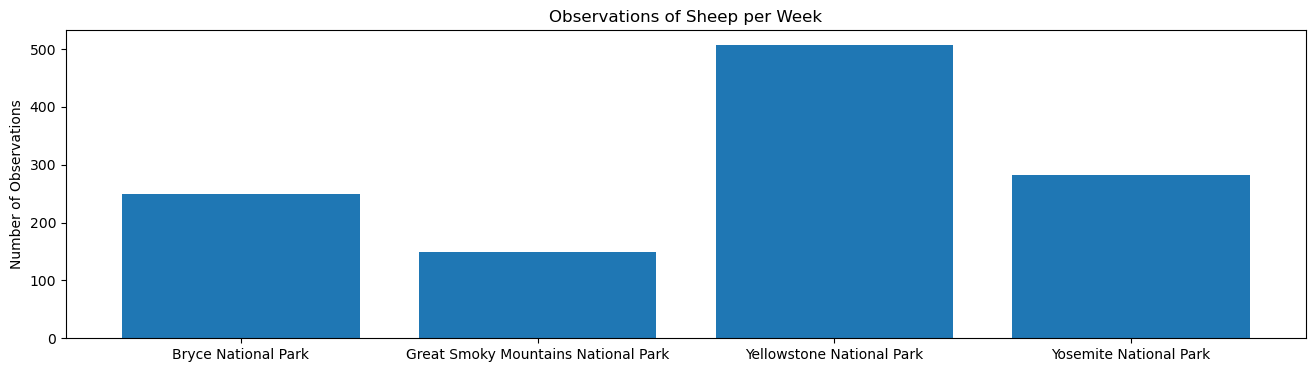

In [42]:
# Creating an observation to show the different number of observations per week at each park
plt.figure(figsize = (16,4))
ax = plt.subplot() I
plt.bar(range(len(obs_by_park)),obs_by_park.observations.values)
ax.set_xticks(range(len(obs_by_park)))
ax.set_xticklabels(obs_by_park.park_name.values)
plt.ylabel("Number of Observations")
plt.title("Observations of Sheep per Week")
plt.show() 